# Linear Reg with Gradient Descent


Now that we have understood how the gradient descent algorithm finds the optimal parameters of the model, in this section, we will understand how can we use gradient descent in linear regression and find the optimal parameter.


The equation of a simple linear regression can be expressed as:

$$ \hat{y} = mx + b (1)$$ 

Thus, we have two parameters $m$ and $b$. We will see how can we use gradient descent and find the optimal values for these two parameters $m$ and $b$. 


In [1]:
# Import libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

## Data Preparation 

**References**
https://medium.com/data-science-365/linear-regression-with-gradient-descent-895bb7d18d52


In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The Advertising dataset captures sales revenue generated with respect to advertisement spends across multiple channels like radio, TV and newspaper. As you can see, there are four columns in the dataset. Since our problem definition involves only sales and TV columns in the dataset, we do not need radio and newspaper columns. 

In [3]:
# drop unwanted columns 
df.drop(columns=['Radio','Newspaper'],inplace=True)
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
df.isnull().sum()

TV       0
Sales    0
dtype: int64

### Parameter Initialization 

We know that equation of a simple linear regression is expressed as:

$$ \hat{y} = mx + b  $$

Thus, we have two parameters $m$ and $b$.  We store both of these parameter $m$ and $b$ in an array called theta. First, we initialize theta with zeros

In [5]:
# define X, Y , Theta 
#---------------------------
N = df['Sales'].values.size  # number of observations 
x = np.append(np.ones((N,1)),df['TV'].values.reshape(N,1),axis=1)
y = df['Sales'].values.reshape(N,1)
theta = np.zeros((2,1))


In [6]:
# test train split
from sklearn.model_selection import train_test_split

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(134, 2) (66, 2) (134, 1) (66, 1)


### Loss function 


Mean Squared Error (MSE) of Regression is given as:

$$J=\frac{1}{2N} \sum_{i=1}^{N}(y-\hat{y})^{2} -- (2) $$


Where $N$ is the number of training samples, $y$ is the actual value and $\hat{y}$ is the predicted value.

The above loss function can be implemented as:

We feed the data and the model parameter theta to the loss function which returns the MSE. Remember, data[,0] has $x$ value and data[,1] has $y$ value. Similarly, theta [0] has a value of $m$ and theta[1] has a value of $b$. 

In [7]:
# define loss function 
def mse_loss(x,y,theta):
    y_pred = np.dot(x,theta)
    sqrd_err = (y - y_pred)**2
    loss = (1/(2*N))*np.sum(sqrd_err)
    return loss 


Now, we need to minimize this loss. In order to minimize the loss, we need to calculate the gradient of the loss function $J$ with respect to the model parameters $m$ and $b$ and update the parameter according to the parameter update rule. So, first, we will calculate the gradient of the loss function.

### Gradients of Loss Function 


Gradients of loss function $J$ with respect to parameter $m$ is given as:


$$ \frac{d J}{d m}=\frac{2}{N} \sum_{i=1}^{N}-x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right) -- (3) $$


Gradients of loss function $J$ with respect to parameter $b$ is given as:


$$ \frac{d J}{d b}=\frac{2}{N} \sum_{i=1}^{N}-\left(y_{i}-\left(m x_{i}+b\right)\right) -- (4) $$





### Update Rule

After computing gradients we need to update our model paramater according to our update rule as given below:

$$m=m-\alpha \frac{d J}{d m} -- (5) $$ 

$$ b=b-\alpha \frac{d J}{d b} --(6) $$


Since we stored $m$ in theta[0] and $b$ in theta[1], we can write our update equation as: 

$$\theta = \theta - \alpha \frac{dJ}{d\theta} -- (7) $$

As we learned in the previous section, updating gradients for just one time will not lead us to the convergence i.e minimum of the cost function, so we need to compute gradients and the update the model parameter for several iterations:

### Defining the Gradient Descent function 

In [8]:
def Gradient_Desc(x,y,learn_rate=0.000008,num_iter=400000):
    losses = []
    theta = np.zeros((2,1))
    for i in range(num_iter):
        y_pred = np.dot(x,theta)
        loss = mse_loss(x,y,theta)
        der = np.dot(x.transpose(),(y_pred-y))/N
        theta -= learn_rate*der
        #print(theta)
        losses.append(loss)
        
    return theta, losses,learn_rate    

### MODEL TRAIN 

In [9]:
# Run the gradient descent on train data
theta, losses,alpha = Gradient_Desc(X_train,y_train)
print(theta)

[[3.10205147]
 [0.06843237]]


### Plot Loss curve 

In [10]:
def plot_loss(losses,alpha):
    fig, ax = plt.subplots(figsize = (9,6))
    ax.plot(losses)
    ax.set_title("Grad Descent loss values Vs iterations",pad=20,size=18,color='gray')
    ax.set_ylabel("losses for  Learning rate =" + str(alpha))
    ax.set_xlabel("Iterations")

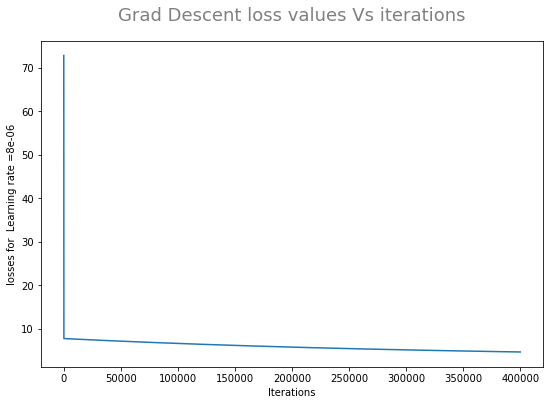

In [11]:
plot_loss(losses,alpha)

### Predict and Accuracy check 

In [12]:
# Predict function
def predict(x,theta):
    y_pred = np.dot(x,np.round(theta,3))
    return y_pred 

In [13]:
# Accuracy function 
def get_accuracy(y_pred,y):
    y_mean = y.mean()
    # Coeff of determination - R squared : Pearson correlation is chosen between y and y_pred
    corrmat = np.corrcoef(y.flatten(),y_pred.flatten())
    pearson_corr = corrmat[0,1]
    R_sq = pearson_corr**2
    # Mean Square Error 
    MSE = ((y - y_pred)**2).mean()
    # Root Mean Square Error 
    RMSE = np.sqrt(MSE)
    accu_dict = {"R_sq":[np.round(R_sq,2)],"RMSE":[np.round(RMSE,2)]}
    return accu_dict


In [14]:
def print_accuracy(accu_dict):
    accu_df = pd.DataFrame(accu_dict)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.colheader_justify', 'center')
    pd.set_option('display.precision', 2)
    display(accu_df)

### MODEL TEST 

#### Train Accuracy 


In [15]:
# predict on train data 
y_pred_train = predict(X_train,theta)
# get accuracy
accu_dict_train = get_accuracy(y_pred_train,y_train)
df1 = pd.DataFrame.from_dict(accu_dict_train)
display(df1)

,R_sq,RMSE
0,0.63,3.72


#### Test Accuracy 

In [16]:
# predict on test data 
y_pred_test = predict(X_test,theta)
# get accuracy
accu_dict_test = get_accuracy(y_pred_test,y_test)
df2 = pd.DataFrame.from_dict(accu_dict_test)
display(df2)

,R_sq,RMSE
0,0.58,3.96


### PLOT Regression line 

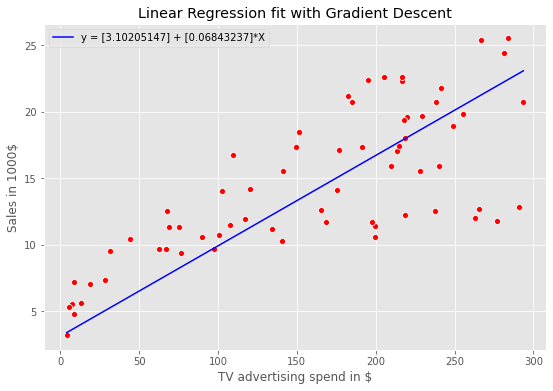

In [39]:
### PLOT Regression Line 
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt


# get data for plot 
xdata = X_test[:,1].flatten()
ydata = y_test.flatten()
y_pred = y_pred_test.flatten()

plt.style.use('ggplot')
fig,ax = plt.subplots(figsize = (9,6))
# plot scatter of raw data 
sns.scatterplot(x=xdata,y=ydata,ax=ax,color='red')

#plot regression line of predicted values 

# create regression equation string 
theta0 = theta[0]
theta1 = theta[1]
reg_eqn = "y = " + str(theta0) + " + " + str(theta1)+"*X"
sns.lineplot(xdata,y_pred,ax=ax,label = reg_eqn,color='blue')

ax.set_title("Linear Regression fit with Gradient Descent")
ax.set_ylabel("Sales in 1000$")
ax.set_xlabel("TV advertising spend in $")
ax.legend(loc="upper left")